## Outlier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()

,Duration,Pulse,Maxpulse,Calories
0,60.0,110.0,130.0,409.1
1,60.0,117.0,145.0,479.0
2,60.0,103.0,135.0,340.0
3,45.0,109.0,175.0,282.4
4,45.0,117.0,148.0,406.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    float64
 1   Pulse     151 non-null    float64
 2   Maxpulse  158 non-null    float64
 3   Calories  153 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB


In [4]:
dataset.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,151.000000,158.000000,153.000000
mean,63.518519,107.125828,133.525316,375.947059
std,42.739602,13.721178,16.426132,267.805109
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,123.250000,251.000000
50%,60.000000,105.000000,131.000000,318.000000
75%,60.000000,111.000000,140.750000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


<function matplotlib.pyplot.show(close=None, block=None)>

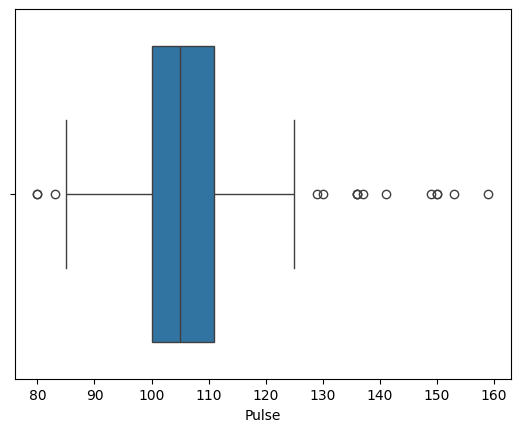

In [5]:
sns.boxplot( x ="Pulse",data = dataset)
plt.show

C:\Users\User\AppData\Local\Temp\ipykernel_11164\1816977649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Pulse"])


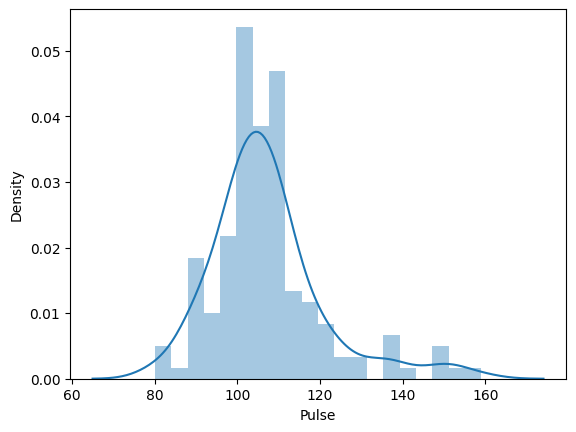

In [6]:
sns.distplot(dataset["Pulse"])
plt.show()

In [7]:
dataset.shape

(169, 4)

## Remove Using Outlier IQR

1. Calculate Q1 and Q3

    1. Q1 (25th percentile): Value below which 25% of the data falls.
    2. Q3 (75th percentile): Value below which 75% of the data falls.


3. Compute IQR
    IQR = Q3 - Q1

4. Determine the Outlier Boundaries
    Lower Bound = Q1 - 1.5 × IQR
    Upper Bound = Q3 + 1.5 × IQR

5. Filter the Data
    Keep only the values between the lower and upper bounds.

In [8]:
q1 = dataset["Pulse"].quantile(0.25)
q3 = dataset["Pulse"].quantile(0.75)

In [9]:
q1

np.float64(100.0)

In [10]:
q3

np.float64(111.0)

In [11]:
IQR = q3 - q1

In [12]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
min_range , max_range 

(np.float64(83.5), np.float64(127.5))

In [13]:
new_data= dataset[dataset["Pulse"] > max_range]

In [14]:
new_data.shape

(12, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

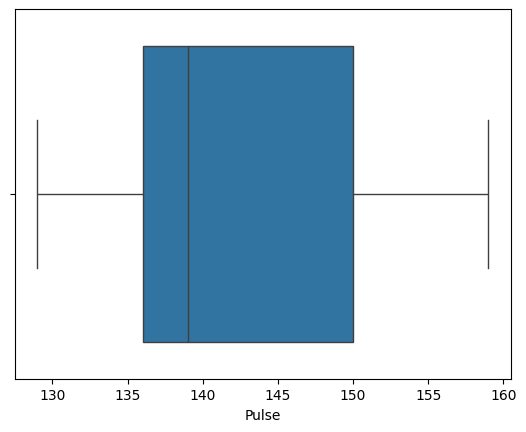

In [15]:
sns.boxplot( x ="Pulse",data = new_data )
plt.show

🧠 Notes:
This method works well for univariate outliers (in one column).
For multivariate outliers, consider other methods like Isolation Forest or DBSCAN.